In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

In [3]:
df = pd.read_csv("data/generic_poll_lead.csv")

In [4]:
df.dtypes

year          int64
lead        float64
in_power     object
dtype: object

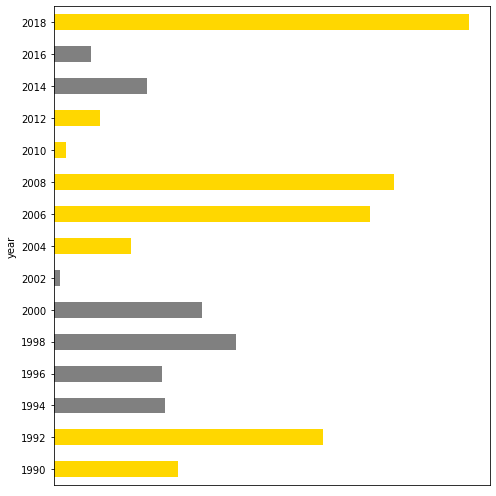

In [5]:
colors = ['gold','gold','gray','gray','gray','gray','gray','gold','gold','gold','gold','gold','gray','gray']
# df.sort_values(by='male').plot(x='state', y='male', kind='barh', color=colors)

ax = df.iloc[::-1].plot(kind='barh', x='year', y='lead', legend=False, color=colors, figsize=(7,7))
ax.set_xticks([])
plt.tight_layout()
plt.savefig("NYT_1.pdf")

In [6]:
spending_df = pd.read_csv("data/social-spending.csv")

In [7]:
spending_df.head(5)

,Country,Social Spending
0,France,31.5%
1,Finland,30.8%
2,Belgium,29.0%
3,Italy,28.9%
4,Denmark,28.7%


In [8]:
spending_df['Social Spending'] = spending_df['Social Spending'].str.extract(r"(\d+.\d+)").astype(float)

In [9]:
spending_df.Country = spending_df.Country.str.strip()

In [10]:
spending_df = spending_df.sort_values(by='Social Spending')

In [11]:
# Building colors to pass to matplotlib or Seaborn
# Use as color=colors for matplotlib, palette=colors for Seaborn
def build_colors(row):
    if row['Country'] == 'Denmark':
        return 'green'
    elif row['Country'] == 'Sweden':
        return 'green'
    elif row['Country'] == 'Norway':
        return 'green'
    elif row['Country'] == 'United States':
        return 'green'
    elif row['Country'] == "O.E.C.D. avg.":
        return 'green'
    else:
        return 'lightgrey'

colors = spending_df.reset_index().apply(build_colors, axis=1)
colors.head()

0    lightgrey
1    lightgrey
2    lightgrey
3    lightgrey
4    lightgrey
dtype: object

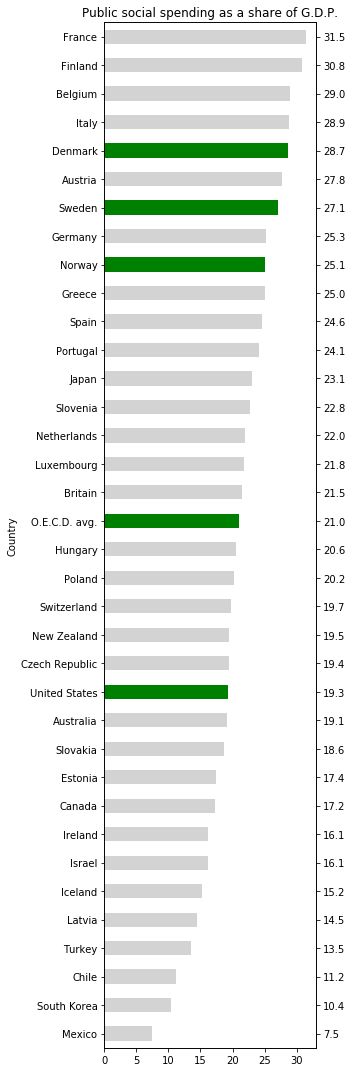

In [12]:
ax = spending_df.plot(kind='barh', x='Country', y='Social Spending', color=colors, figsize=(5, 15), title="Public social spending as a share of G.D.P.", legend=False)
alt = ax.twinx()
# Set the new graph to have its tick marks in the same position
alt.set_yticks(ax.yaxis.get_ticklocs()) 
alt.set_ylim(ax.get_ylim())
# Set the labels for the tick marks to be the same, too
alt.set_yticklabels(spending_df['Social Spending'])
plt.tight_layout()
plt.savefig("NYT_2.pdf")

In [13]:
cook_df = pd.read_csv("data/cook_pvi.csv")

In [21]:
cook_df

,cook_pvi,pct_defeated
0,C+7 or greater,76
1,C+3 to C+7,63
2,C+1 to C+3,61
3,I+1 to C+1,35
4,I+1 to I+3,25
5,I+3 to I+5,18
6,I+5 to I+10,7
7,I+10 or greater,0


In [34]:
def survived(row):
    row['pct_survived'] = 100 - row['pct_defeated']
    return row['pct_survived']

In [36]:
cook_df['pct_survived'] = cook_df.apply(survived, axis=1)

In [37]:
cook_df.head()

,cook_pvi,pct_defeated,pct_survived
0,C+7 or greater,76,24
1,C+3 to C+7,63,37
2,C+1 to C+3,61,39
3,I+1 to C+1,35,65
4,I+1 to I+3,25,75


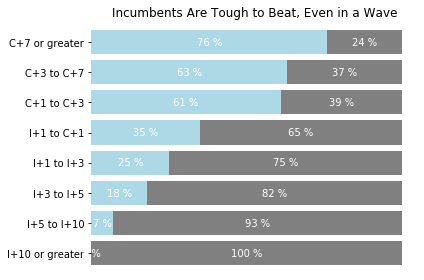

In [134]:
ax = cook_df.iloc[::-1].plot(kind='barh', x='cook_pvi', y=['pct_defeated', 'pct_survived'], legend=False, stacked=True, color=['lightblue', 'gray'], title='Incumbents Are Tough to Beat, Even in a Wave', width=.8)
# df.plot.bar
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.0f} %'.format(width), 
            ha='center', 
            va='center',
            color='white')
    
plt.tight_layout()
plt.savefig("NYT_3.pdf")